<h1 style = "font-size:3rem;color:blue;"> Drifter Data Analysis</h1>



Data formatting for Biogeochemical Drifter field observations


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Read in data and parse by column header


In [6]:
filename = '24110600_truncate'

fullname = filename+'.csv'

filepath = os.path.join('D:', fullname)

df = pd.read_csv(filepath, parse_dates = [[0, 1]], header = None)

df.columns = ['time', 'elapsed time (sec)', 'lat_raw', 'N or S', 'lon_raw', 'E or W', 'altitude', 'speed', 'angle', 'pH', 'Temperature (C)', 'DO (mg/L)', 'Conductivity (uS/cm)']

df.head()

C:\Users\thoma\AppData\Local\Temp\ipykernel_15364\1467310119.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(filepath, parse_dates = [[0, 1]], header = None)
C:\Users\thoma\AppData\Local\Temp\ipykernel_15364\1467310119.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates = [[0, 1]], header = None)


,time,elapsed time (sec),lat_raw,N or S,lon_raw,E or W,altitude,speed,angle,pH,Temperature (C),DO (mg/L),Conductivity (uS/cm)
0,11/6/2024 34:24.1,158,3408.40186,N,7751.75391,W,-36.8,0.38,261.94,0.19,27.84,8.80,0
1,11/6/2024 34:25.1,160,3408.40137,N,7751.75391,W,-35.8,0.21,261.94,0.19,27.84,8.80,0
2,11/6/2024 34:28.0,162,3408.40161,N,7751.75391,W,-34.6,0.37,261.94,0.25,27.71,8.78,0
3,11/6/2024 34:30.0,164,3408.40137,N,7751.75342,W,-33.0,0.38,261.94,0.31,27.71,8.78,0
4,11/6/2024 34:32.0,166,3408.40112,N,7751.75342,W,-32.0,0.15,261.94,0.46,27.70,8.78,0


In [8]:
df.index

RangeIndex(start=0, stop=31437, step=1)

In [10]:
# GPS spits out lat DDMM.MMMM, lon DDDMM.MMMM, so additional processing required
def lat_convert(lat_badfmt):
    lat_badfmt = str(lat_badfmt)
    lat_DD = int(float(lat_badfmt)/100) # get DDD part
    lat_MM = float(lat_badfmt)-lat_DD*100 # get MM.MMM part
    lat_deg = float(lat_DD)+float(lat_MM)/60 # add minutes divided by 60 to degrees
    return lat_deg

def lon_convert(lon_badfmt):
    lon_badfmt = str(lon_badfmt)
    lon_DD = int(float(lon_badfmt)/100) # get DDD part
    lon_MM = float(lon_badfmt)-lon_DD*100 # get MM.MMM part
    lon_deg = float(lon_DD)+float(lon_MM)/60 # add minutes divided by 60 to degrees
    return lon_deg

# Do the conversion on real data
df['lat'] = df['lat_raw'].apply(lat_convert)
df['lon'] = df['lon_raw'].apply(lon_convert)

# South should be negative
south = df['N or S'] == 'S'
df.loc[south, 'lat'] *= -1 

# West should be negative
west = df['E or W'] == 'W'
df.loc[west, 'lon'] *= -1 

# Take a look
df.head()

,time,elapsed time (sec),lat_raw,N or S,lon_raw,E or W,altitude,speed,angle,pH,Temperature (C),DO (mg/L),Conductivity (uS/cm),lat,lon
0,11/6/2024 34:24.1,158,3408.40186,N,7751.75391,W,-36.8,0.38,261.94,0.19,27.84,8.80,0,34.140031,-77.862565
1,11/6/2024 34:25.1,160,3408.40137,N,7751.75391,W,-35.8,0.21,261.94,0.19,27.84,8.80,0,34.140023,-77.862565
2,11/6/2024 34:28.0,162,3408.40161,N,7751.75391,W,-34.6,0.37,261.94,0.25,27.71,8.78,0,34.140027,-77.862565
3,11/6/2024 34:30.0,164,3408.40137,N,7751.75342,W,-33.0,0.38,261.94,0.31,27.71,8.78,0,34.140023,-77.862557
4,11/6/2024 34:32.0,166,3408.40112,N,7751.75342,W,-32.0,0.15,261.94,0.46,27.70,8.78,0,34.140019,-77.862557


In [12]:
df.columns

Index(['time', 'elapsed time (sec)', 'lat_raw', 'N or S', 'lon_raw', 'E or W',
       'altitude', 'speed', 'angle', 'pH', 'Temperature (C)', 'DO (mg/L)',
       'Conductivity (uS/cm)', 'lat', 'lon'],
      dtype='object')

In [14]:
# lon = df['lon']
# lat = df['lat']
# # def plot_gps_points(lon, lat):
# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}) 
# stamen_terrain = cimgt.Stamen('terrain')
# ax.add_image(stamen_terrain, 8)

# # Plot the GPS points
# ax.plot(lon, lat, 'bo', markersize=5, transform=ccrs.PlateCarree())

# # Add gridlines
# gl = ax.gridlines(draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER




In [16]:
# plt.scatter(df.lon, df.lat)
# plt.ylim((34.138,34.142))
# plt.xlim((-77.862,-77.863))

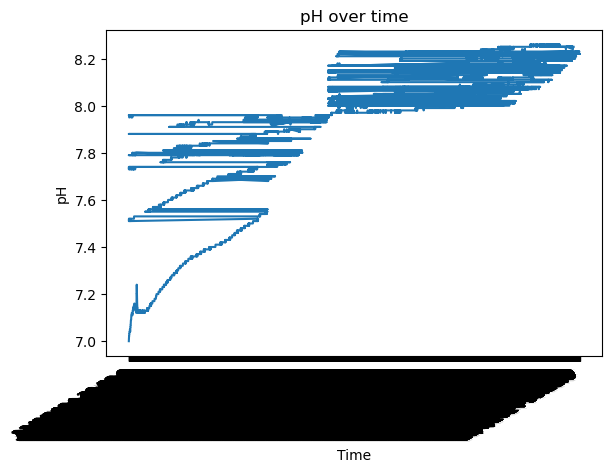

In [18]:

ph_threshold = 7
df_filtered = df[df['pH'] >= ph_threshold]
time= df_filtered['time']
ph = df_filtered['pH']

fig, axs = plt.subplots()
axs.plot(time,ph)
axs.set_title('pH over time')
axs.set_xlabel('Time')
axs.set_ylabel('pH')

fig.autofmt_xdate()

In [ ]:
DO = df_filtered['DO (mg/L)']

fig, axs = plt.subplots()
axs.plot(time,DO)
axs.set_title('DO over time')
axs.set_xlabel('Time')
axs.set_ylabel('DO (mg/L)')

fig.autofmt_xdate()

In [ ]:
temp = df_filtered['Temperature (C)']

plt.plot(time,temp)
plt.title('Temperature over time')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')

In [ ]:
cond = df_filtered['Conductivity (uS/cm)']

plt.plot(time,cond)
plt.title('Conductivity over time')
plt.xlabel('Time')
plt.ylabel('Conductivity (uS/cm)')

In [ ]:
# DO_mean = np.nanmean(DO)
# DO_STD = np.nanstd(DO)
# DOZ = ((DO-DO_mean)/DO_STD)

# ph_mean = np.nanmean(ph)
# ph_STD = np.nanstd(ph)
# phZ = ((ph-ph_mean)/ph_STD)

# DOph_correlation_coeff = ((DOZ*phZ)/(len(DOZ)-1))
# DOZCorr = DOZ * DOph_correlation_coeff

In [1]:
# plt.scatter(DOZ,phZ)
# plt.plot(DOZ, DOZCorr)
# plt.title('DO vs pH')
# plt.xlabel('DO mg/L')
# plt.ylabel('pH')

NameError: name 'plt' is not defined

In [ ]:
# plt.scatter(DO, temp)
# plt.title('DO vs temp')
# plt.xlabel('DO mg/L')
# plt.ylabel('Temperature (C)')

In [ ]:
# stamen_terrain = cimgt.Stamen('terrain-background')

# # Create the map
# fig = plt.figure(figsize=(10, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.add_image(stamen_terrain, 8)  # Adjust the zoom level as needed

# # Plot GPS points
# plt.scatter(lon, lat, color='red', s=50, transform=ccrs.PlateCarree(), label='GPS Points')
# plt.legend()

# # Add title and show plot
# plt.title("GPS Points on Stamen Terrain Map")
# plt.show()

In [ ]:
CORMP = 'CORMP_DATA_NOV6'
fullCORMP = CORMP + '.csv'
pathing = os.path.join('D:\\', fullCORMP)  # Ensuring path format is correct for Windows

# Load the CSV file, assuming columns 0 and 1 are date and time columns
Cdf = pd.read_csv(pathing, skiprows = 6, parse_dates= [0])

# Rename columns, assuming the remaining column is 'DO'
Cdf.columns = ['time', 'DO', 'Nothing']
print(Cdf.head())

In [ ]:
cormptime = Cdf['time']
cormpDO = Cdf['DO']
# Ctdf = datetime.strptime('cormptime','%m/%d/%Y %I:%M:%S %p')
# Ctime = Ctdf.strftime('%I:%M:%S %p')
fig, axs = plt.subplots()

plt.plot(df['time'],df['DO (mg/L)'])
plt.plot(Cdf['time'],cormpDO)

fig.autofmt_xdate()